In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import pylab as pl
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [161]:
df=pd.read_csv("housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# DAta Exploration

In [162]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [163]:
cdf=df[['price','area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
cdf.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


# Analysis

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [165]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [166]:
df['price'].value_counts()

price
3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: count, Length: 219, dtype: int64

# Visualization 

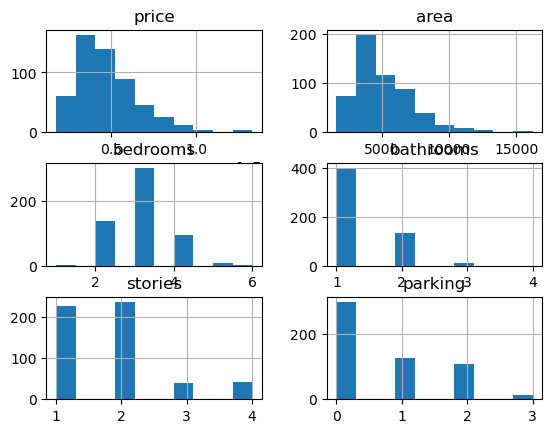

In [167]:
viz=df[['price','area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
viz.hist()
plt.show()

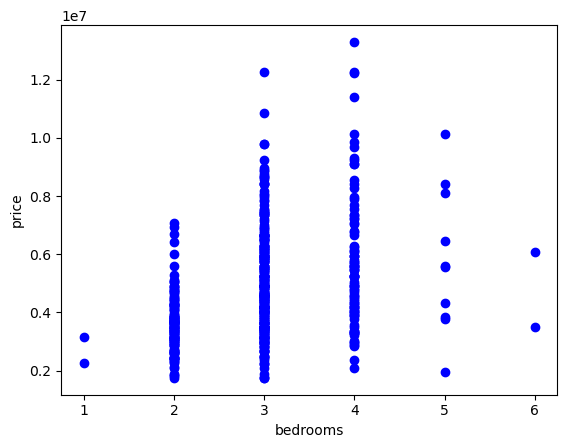

In [168]:
plt.scatter(cdf.bedrooms,cdf.price,color='blue')
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.show()

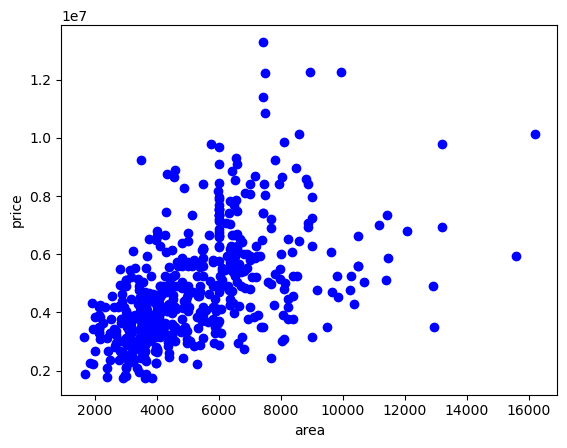

In [169]:
plt.scatter(cdf.area,cdf.price,color='blue')
plt.xlabel("area")
plt.ylabel("price")
plt.show()

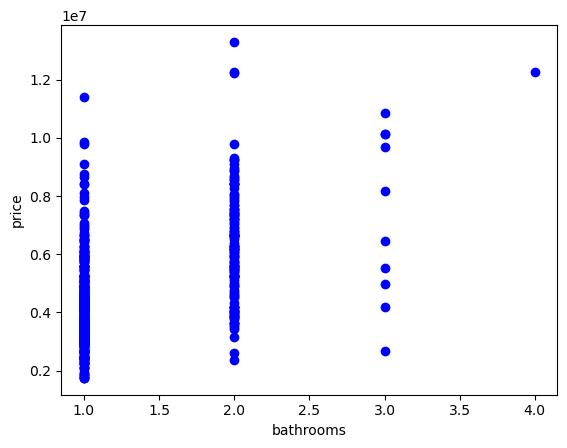

In [170]:
plt.scatter(cdf.bathrooms,cdf.price,color='blue')
plt.xlabel("bathrooms")
plt.ylabel("price")
plt.show()

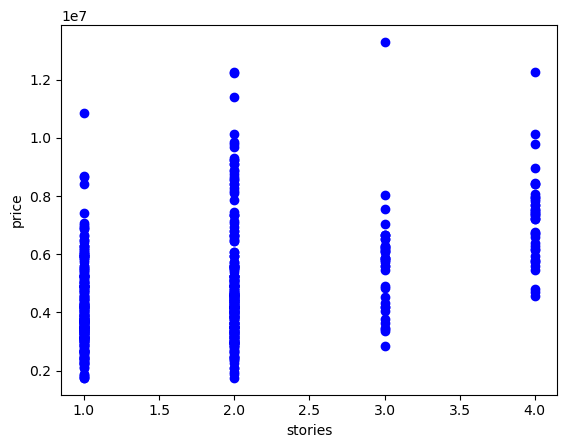

In [171]:
plt.scatter(cdf.stories,cdf.price,color='blue')
plt.xlabel("stories")
plt.ylabel("price")
plt.show()

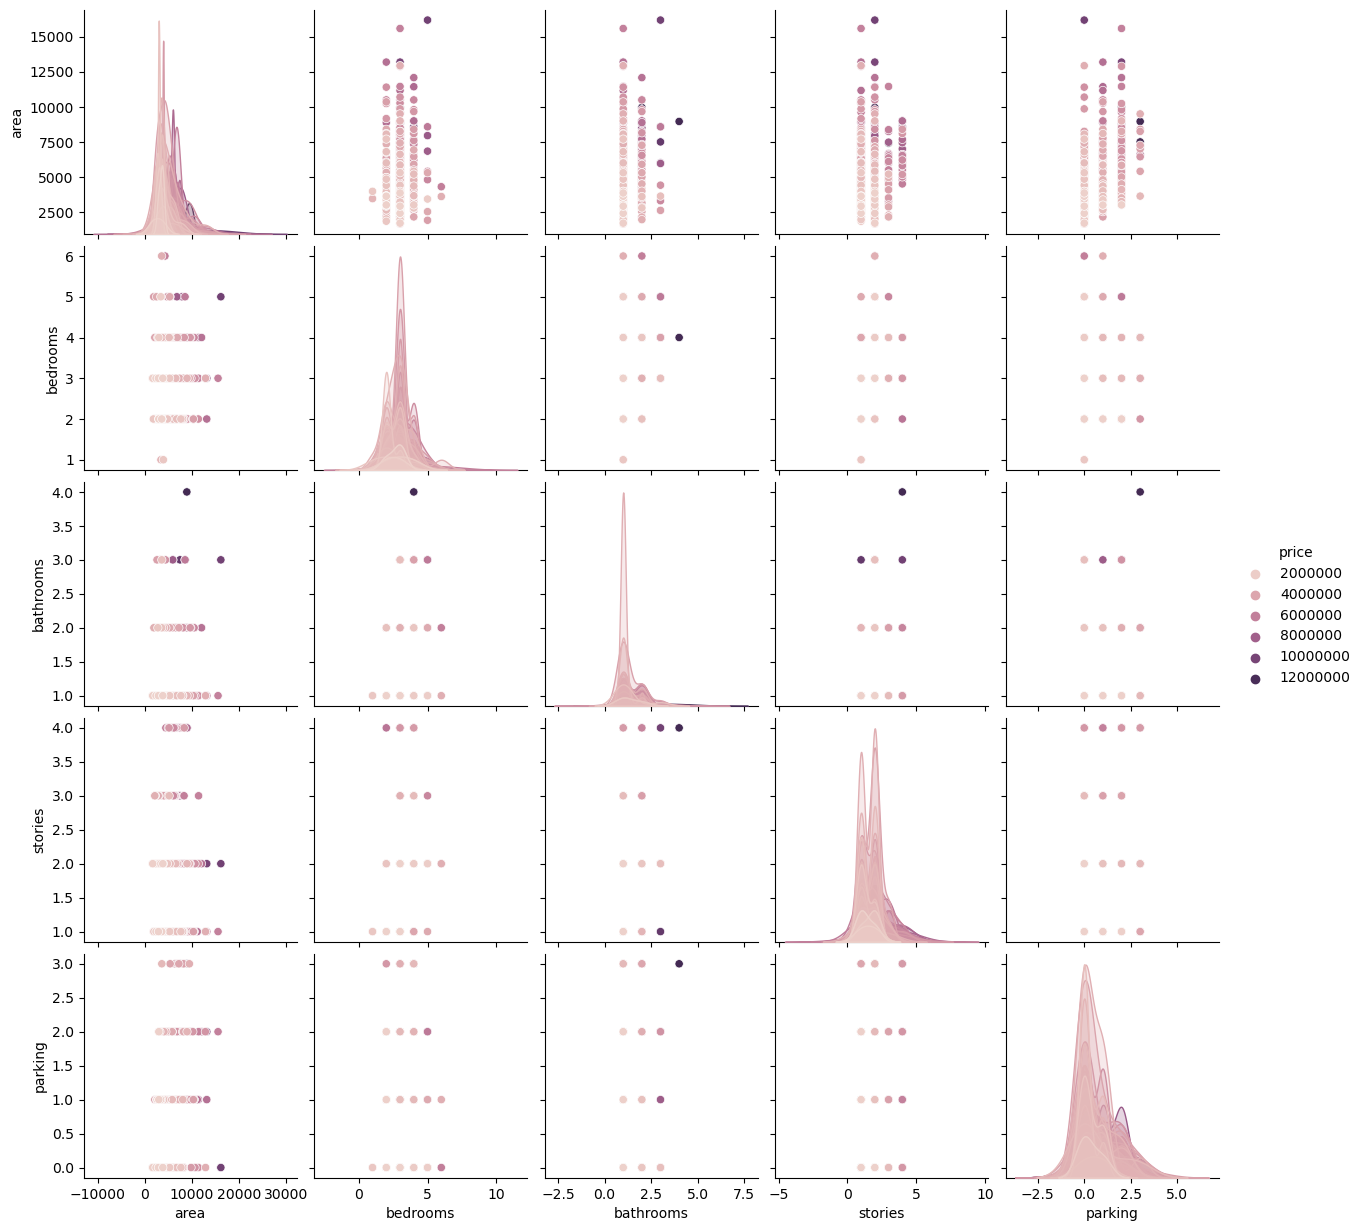

In [172]:
sns.pairplot(df,hue='price')

# Train And Test Dataset

In [173]:
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

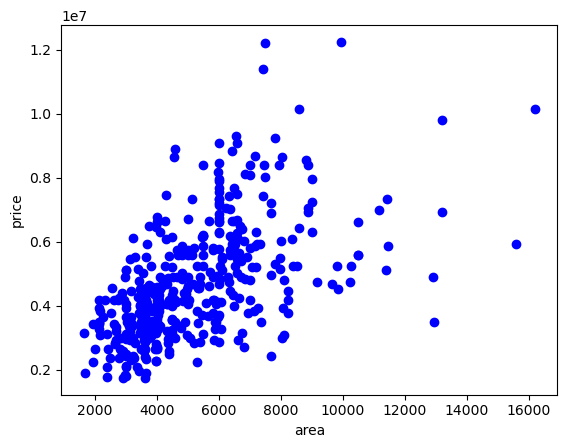

In [184]:
plt.scatter(train.area,train.price,color='blue')
plt.xlabel("area")
plt.ylabel("price")
plt.show()

# Modeling

In [175]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['area']])
train_y=np.asanyarray(train[['price']])
regr.fit(train_x,train_y)


LinearRegression()

In [176]:
# the coefficients
print('coefficient:',regr.coef_)
print('Intercept:',regr.intercept_)

coefficient: [[461.66506306]]
Intercept: [2318800.64751212]


## plot output

Text(0, 0.5, 'price')

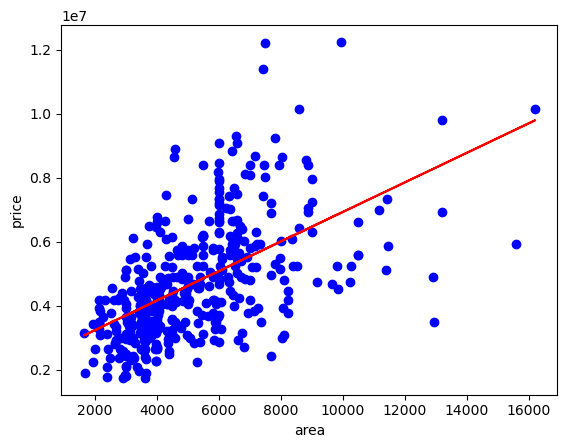

In [177]:
plt.scatter(train.area,train.price,color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0],'-r')
plt.xlabel("area")
plt.ylabel("price")

In [178]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['area','bedrooms','bathrooms','parking']])
train_y=np.asanyarray(train[['price']])
regr.fit(train_x,train_y)


LinearRegression()

In [179]:
print('coefficient:',regr.coef_)

coefficient: [[3.46412806e+02 3.47170979e+05 1.19084248e+06 3.55645517e+05]]


# Prediction

In [180]:
y_hat=regr.predict(test[['area','bedrooms','bathrooms','parking']])
X=np.asanyarray(test[['area','bedrooms','bathrooms','parking']])
Y=np.asanyarray(test[['price']])
print("Residual sum of square: %.2f"%np.mean((y_hat-Y)**2))
print("Variance score:%.2f"%regr.score(X,Y))

Residual sum of square: 2133143124582.84
Variance score:0.52


In [181]:
import pickle
filename='house-price-prediction-model.sav'
try:
    with open(filename,'wb') as file:
        pickle.dump(regr,file)
    print("Model saved successfully.")
except Exception as e:
    print(f"Error saving the model: {e}")

Model saved successfully.


In [182]:
load_model=pickle.load(open(filename,'rb'))

In [183]:
load_model.predict([[3424,4,3,2]])

array([[7005938.61905766]])